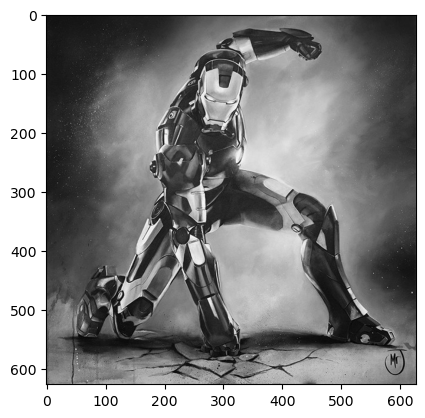

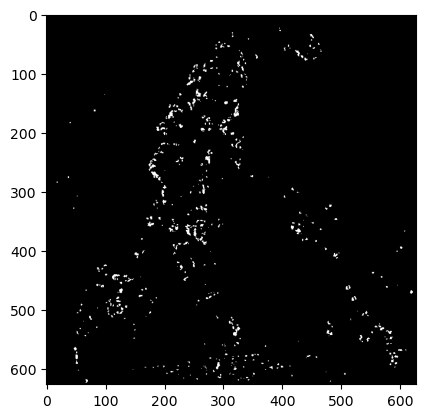

In [9]:
import numpy as np
from scipy.ndimage import convolve
import cv2
from matplotlib import pyplot as plt
from scipy.ndimage import convolve
import os

class line_detection:
    def __init__(self, loc):
        # Read the input image
        self.image = cv2.imread(loc, cv2.IMREAD_GRAYSCALE)
        self.img_rows, self.img_cols = self.image.shape
        
    def Ix(self):
        return self.Filter(self.kernel_sobel_horizontal())
    def Iy(self):
        return self.Filter(self.kernel_sobel_vertical())

    def Filter(self,H):
        self.k_rows, self.k_cols = H.shape
        output = np.zeros((self.img_rows, self.img_cols))
        for i in range(self.img_rows - self.k_rows + 1):
            for j in range(self.img_cols - self.k_cols + 1):
                area = self.image[i:i+self.k_rows, j:j+self.k_cols]
                conv = np.sum(np.multiply(area, H))
                output[i + self.k_rows//2, j + self.k_cols//2] = conv
        return output

    def kernel_sobel_horizontal(self):
        H = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]

        ], dtype=np.float32)
        return H
    def kernel_sobel_vertical(self):
        H = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]

        ], dtype=np.float32)
        return H

class gaussian:
    def __init__(self, window_size, sigma):
        if window_size % 2 == 0:
            raise ValueError("Window size must be odd.")

        # center of the kernel
        center = window_size // 2

        # Generating 1D Gaussian kernel
        self.kernel_1d = np.array([np.exp(-(i - center)**2 / (2 * sigma**2)) for i in range(window_size)])

        # Normalize the 1D kernel
        self.kernel_1d /= np.sum(self.kernel_1d)

    def kernel(self, window_size):
        kernel_2d = np.zeros((window_size, window_size))
        for i in range(window_size):
            for j in range(window_size):
                kernel_2d[i, j] = self.kernel_1d[i] * self.kernel_1d[j]
        return kernel_2d
    
class convolution:
    def __init__(self, image, kernel):
        self.m, self.n = image.shape
        self.k_m, self.k_n = kernel.shape
        self.result = np.zeros_like(image)
        self.image = image
        self.kernel = kernel
        
    def conv(self):
        for i in range(self.m - self.k_m + 1):
            for j in range(self.n - self.k_n + 1):
                self.result[i, j] = np.sum(self.image[i:i+self.k_m, j:j+self.k_n] * self.kernel)
        return self.result
    
# Example usage:
output_dir =r'C:\Users\Tanjib Ahmed\Desktop\CCCC\image\5'



def harris_corner_detection(image, threshold, k, window_size, sigma):
    # Step 1: Compute gradients
    Ix = line_detection(loc = loc).Ix()
    Iy = line_detection(loc = loc).Iy()
    

     # Step 2: Compute products of gradients
    Ix2 = Ix ** 2
    Iy2 = Iy ** 2
    Ixy = Ix * Iy

    # Step 3: Spatial windowing using Gaussian
    gaussian_kernel = gaussian(window_size = window_size, sigma = sigma).kernel(window_size = window_size)
    W = gaussian_kernel



    Ix2 = convolution(image = Ix2, kernel = W).conv()
    Iy2 = convolution(image = Iy2, kernel = W).conv()
    Ixy = convolution(image = Ixy, kernel = W).conv()
    # Step 4: Compute corner response
    det_M = Ix2 * Iy2 - Ixy ** 2
    trace_M = Ix2 + Iy2
    R = det_M - k * (trace_M ** 2)


    # Step 5: Thresholding and non-maximum suppression
    corners = np.zeros_like(image)
    corners[R > threshold * R.max()] = 255
    return corners.astype(np.uint8)
loc = r'im2.jpg'
# Load an example image
image = cv2.imread(loc, cv2.IMREAD_GRAYSCALE)

# Apply Harris Corner Detection
corners = harris_corner_detection(image, threshold=0.01, k=0.04, window_size=3, sigma = 1)

# Display the original image and the detected corners
plt.imshow(image, cmap = 'gray')
plt.show()
plt.imshow(corners, cmap = 'gray')

plt.show()
